In [4]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Load your dataset
relative_path = os.path.join("data", "retail_sales_dataset.csv")
df = pd.read_csv(relative_path)


In [9]:
# Load and Prepare the Data
# Example: Predict 'Total Amount' based on 'Quantity' and 'Price per Unit'
X = df[['Quantity', 'Price per Unit']]
y = df['Total Amount']

In [10]:
#Split the Data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the Linear Regression Model:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
#Make Predictions:
y_pred = model.predict(X_test)


In [13]:
# Evaluate the Model:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 41860.81317288644
R-squared: 0.8569981574765706


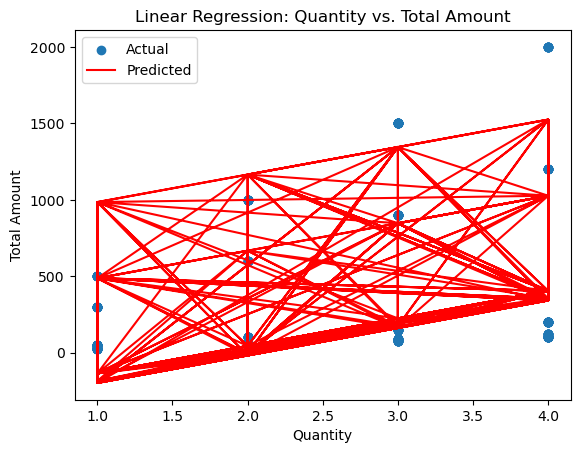

In [14]:
# Visualize the Results (For Simple Linear Regression with One Predictor)
# Assuming you used only 'Quantity' as X
plt.scatter(X_test['Quantity'], y_test, label="Actual")
plt.plot(X_test['Quantity'], y_pred, color='red', label="Predicted")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.title("Linear Regression: Quantity vs. Total Amount")
plt.legend()
plt.show()

Age Mean Squared Error: 294789.2739219267
Age R-squared: -0.007037516277486722


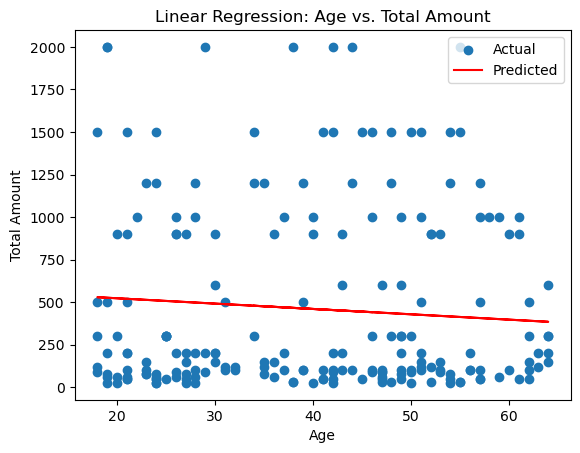

In [15]:
# Example with Age
X_age = df[['Age']]
y_age = df['Total Amount']

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.2, random_state=42)

model_age = LinearRegression()
model_age.fit(X_train_age, y_train_age)

y_pred_age = model_age.predict(X_test_age)

mse_age = mean_squared_error(y_test_age, y_pred_age)
r2_age = r2_score(y_test_age, y_pred_age)

print(f"Age Mean Squared Error: {mse_age}")
print(f"Age R-squared: {r2_age}")

plt.scatter(X_test_age['Age'], y_test_age, label="Actual")
plt.plot(X_test_age['Age'], y_pred_age, color='red', label="Predicted")
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.title("Linear Regression: Age vs. Total Amount")
plt.legend()
plt.show()